---
### Gradient Descent 
---

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
sns.set()

---
#### Import & prepare the data
---

In [2]:
data = pd.read_csv(r'data_2.txt', header = None, names = ['pop', 'profit'])
data.insert(0, 'theta_0', 1)
data.describe()

,theta_0,pop,profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


In [3]:
x = np.matrix(data.iloc[:,:-1].values)
y = np.matrix(data.iloc[:,-1:].values)
theta = np.matrix(np.array([0] * x.shape[1]))

---
#### Functions
---

In [4]:
def error_calc(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    err = np.sum(inner) /  (2 * len(x))
    return err

def gradDescent(x, y, theta, alpha, iters):
    t = np.matrix(np.zeros(theta.shape))
    paramater = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (x * theta.T) - y
        for j in range(paramater):
            term = np.multiply(error, x[:, j])
            t[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))

        theta = t
        cost[i] = error_calc(x, y, theta)
    return theta, cost

---
#### Modelling
---

In [8]:
alpha = 0.01
iters = 8888

grad_dec, cost = gradDescent(x, y, theta, alpha, iters)

print('Error before gradDescent:', error_calc(x, y, theta).round(2))
print('Error after gradDescent:', error_calc(x, y, grad_dec).round(2))
print('Gradient:', grad_dec.round(2))

Error before gradDescent: 32.07
Error after gradDescent: 4.48
Gradient: [[-3.9   1.19]]


---
#### Plots
---

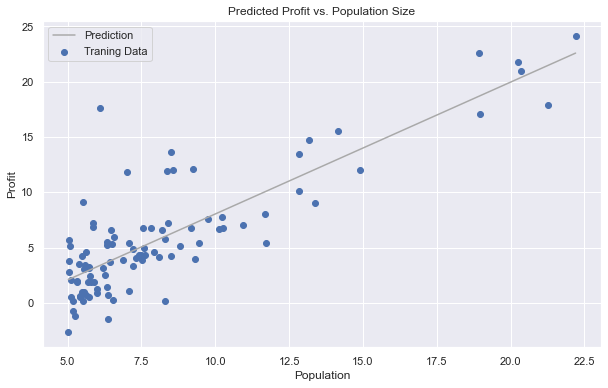

In [9]:
xp = np.linspace(data['pop'].min(), data['pop'].max(), 100)
f = grad_dec[0, 0] + (grad_dec[0, 1] * xp)

fig, ax = plt.subplots(figsize = (10,6))  
ax.plot(xp, f, 'darkgray', label = 'Prediction')  
ax.scatter(data['pop'], data['profit'], label = 'Traning Data')  
ax.legend(loc = 2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size');
